In [16]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [17]:
data= pd.read_csv('./Dataset/Housing.csv')
df=pd.DataFrame(data)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [18]:
# Convert 'yes'/'no' columns to 1/0
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})

In [19]:
# Menggunakan one-hot encoding untuk kolom 'furnishingstatus'
category = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

In [20]:
# Memastikan kolom hasil one-hot encoding berisi nilai 0 atau 1
category['furnishingstatus_semi-furnished'] = category['furnishingstatus_semi-furnished'].astype(int)
category['furnishingstatus_unfurnished'] = category['furnishingstatus_unfurnished'].astype(int)

In [23]:
# Ensure all data is numeric
print(category.dtypes)

price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
mainroad                           int64
guestroom                          int64
basement                           int64
hotwaterheating                    int64
airconditioning                    int64
parking                            int64
prefarea                           int64
furnishingstatus_semi-furnished    int64
furnishingstatus_unfurnished       int64
dtype: object


In [24]:
# Separate features and labels
X = category.drop('price', axis=1).values
y = category['price'].values


In [26]:
# Normalize the features
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled

array([[0.39656357, 0.6       , 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [0.5024055 , 0.6       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.57113402, 0.4       , 0.33333333, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.13539519, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08659794, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15120275, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3)

In [52]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                896       
                                                                 
 dense_13 (Dense)            (None, 48)                3120      
                                                                 
 dense_14 (Dense)            (None, 32)                1568      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5617 (21.94 KB)
Trainable params: 5617 (21.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.compile(optimizer='Adam', 
              loss='mean_squared_error',
              metrics=['mse']
              )

In [55]:
# Train the model
history=model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_split=0.3)

# Evaluate the model
loss = model.evaluate(X_test, Y_test)
print(f'Test loss: {loss}')

Epoch 1/50
27/27 [==============================] - 0s 2ms/step - loss: 2556634333184.0000 - mse: 2556634333184.0000 - val_loss: 1234259673088.0000 - val_mse: 1234259673088.0000
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 2436494000128.0000 - mse: 2436494000128.0000 - val_loss: 1206265839616.0000 - val_mse: 1206265839616.0000
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 2345174040576.0000 - mse: 2345174040576.0000 - val_loss: 1194500554752.0000 - val_mse: 1194500554752.0000
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 2273936670720.0000 - mse: 2273936670720.0000 - val_loss: 1192768700416.0000 - val_mse: 1192768700416.0000
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 2225205673984.0000 - mse: 2225205673984.0000 - val_loss: 1199793635328.0000 - val_mse: 1199793635328.0000
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 2182717112320.0000 - mse: 218271711232

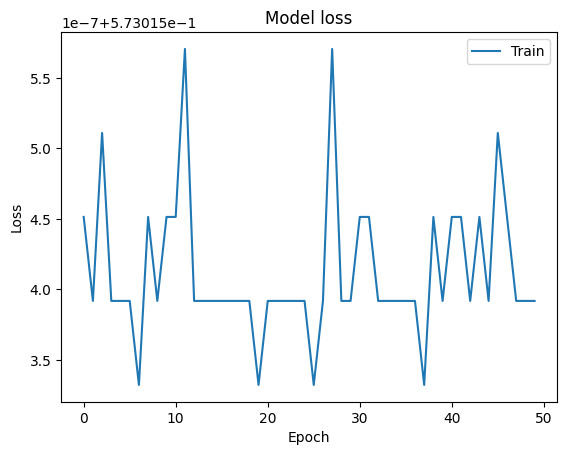

In [47]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()